# 🌎 GPGN268 - Geophysical Data Analysis
- **Instructor:** Bia Villas Boas  
- **TA:** Jordan Pettyjohn

## Lecture 22: Introduction to Seismic Data

#### 🎯 Learning Objectives from this Lecture:
- Explore differences between data formats and how each format is stored in the computer
- Describe the advantages/disadvantages of storing data in binary format 

### What is (are) data?
Ultimately, as we know, all digital data are just 1s and 0s. Each 1 or 0 value is called a bit. Bits are usually grouped together in groups of 8 [bits](https://en.wikipedia.org/wiki/Bit), called a byte. A [byte](https://en.wikipedia.org/wiki/Byte) can represent $2^8$, or 256, distinct values. We can choose to encode and organize the bytes in many different ways to represent different types of information.

#### Numerical Data
The most straightforward way to interpret a byte is as an integer.

In [1]:
# the leading 0b tell Python we are wrinting a binary
value = 0b00000010  # 1 byte (8-bits) base-2 literal
value

2

🤔 What is the largest number you can write with 1 byte?

However, many different numerical data types can be encoded as bytes. The more bytes we use for each value, the more range or precision we get.

In [2]:
import numpy as np

print(np.dtype('i2'), '=', np.dtype('i2').itemsize, "bytes")
print(np.dtype('f8'), '=', np.dtype('f8').itemsize, "bytes")

int16 = 2 bytes
float64 = 8 bytes


#### Text Data

We can also encode text as bytes.

The simplest encoding is ASCII (American Standard Code for Information Interchange). ASCII uses one byte per character and therefore the ASCII alphabet only contains 256 different characters.

![](https://upload.wikimedia.org/wikipedia/commons/c/cf/USASCII_code_chart.png)

As computers became more powerful, and the computing community grew beyond the US and Western Europe, a more inclusive character encoding standard called Unicode took hold. The most common encoding is UTF-8. UTF-8 uses four bytes per character. The text on this Jupyter Notebook use UTF-8 encoding.

Fun fact: emojis are UTF-8 characters.

Single values will only take us so far. To represent scientific data, we need to think about data organization.

#### Tabular Data
A very common type of data is “tabular data”. We discussed it already in our Pandas lectures and Data Stories. Tabular data consists of rows and columns. The columns usually have a name and a specific data type. Each row is a distinct sample. The simplest and most common way to encode tabular data is in a text file as CSV (comma-separated values). CSV is readable by humans and computer programs.


#### Array Data
When we have numerical data that are organized into an N-dimensional rectangular grid of values, we are dealing with array data.

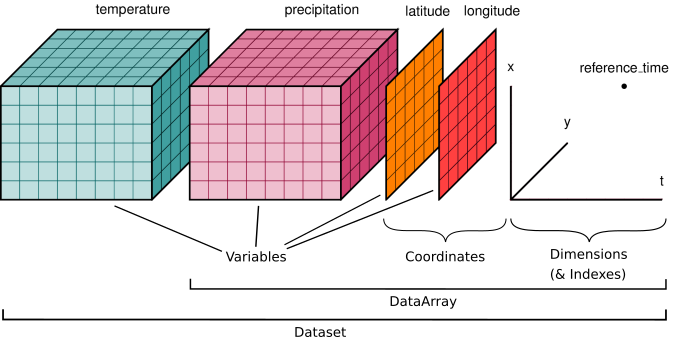


So far, we've use Numpy and Xarray to manipulate array data that was stored as text files (such as our Denver meteorological data analysis) or netCDF files (such as our global warming data story).

🤔 **How were these two different formats of data actually stored in your computer?**

### The big data conundrum

Let's say I want to record for each day of the year whether or not I went surfing. I have a couple of options here. I can open the terminal, launch Vim and each day I write "Y" if I went surfing and "N" if I didn't surf. This would look something like this:

```
$ vim surfing_history.txt
```

```
NNNNNNNNYYNNYYYNNNN
```

For each day there are only two possibilites: "Y" or "N". **How much memory does it take to record data for one day?**

While each character in an ASCII text file takes up 1-byte (8 bits), if we chose to record our data in binary format where `1 = "Y"` and `0 = "N"` we would only need 1 bit per day. With laptops that have hundreds of gigabytes of storage, it might seem irrelevant to worry over bits and bytes. However
- Many platforms and sensors have limited bandwidth to transmit data
- Many platforms/instruments are deployed and need to store data using limited hardware
- Geophysical data can easily take up **hundreds of terabytes** of space, as is the case for data from Distributed Acoustic Sensors. At these scales, it's crucial to store the data in a format that is optimized for large volumes.

![pubDAS](pubDAS.png)
Table from [Spica et al., 2022](file:///Users/bia/Downloads/pubdas-eartharxiv-preprint.pdf) showing the volume of several public DAS datasets

### The HDF binary data format

HDF stands for [Hierarchical Data Format](https://en.wikipedia.org/wiki/Hierarchical_Data_Format) and it lets you store huge amounts of numerical data, and easily manipulate that data from NumPy. For example, you can slice into multi-terabyte datasets stored on disk, as if they were real NumPy arrays. Thousands of datasets can be stored in a single file, categorized and tagged however you want.

HDF supports a variety of data types: scientific data arrays, tables, and text annotations, as well
as several types of raster images and their associated color palettes. There are two distinct varieties of HDF, known as HDF (version 4 and earlier) and the newer HDF5. 

Some of the features of HDF are:
- HDF makes it possible for programs to obtain information about the data from the data file itself, rather than from another source.
- HDF is a platform independent file format. It can be used on many different computers,regardless of the operating system that machine is running.
- HDF files are also self-describing. 

For each data object in an HDF file, there are predefined tags that identify such information as the type of data, the amount of data, its dimensions, and its location in the file. The self-describing capability of HDF files has important implications for processing scientific data. It makes it possible to fully understand the structure and contents of a file just from the information stored in the file itself. A program that has been written to interpret certain tag types can scan a file containing those tag types and process the corresponding data. Self-description also means that many types of data can be bundled in an HDF file. For example, it is possible to accommodate symbolic, numerical, and graphical data in one HDF file.

To better understand how HDF works, we will use some DAS data from the Geophysics Exploration Laboratory located on Kafadar Commons.

### The NetCDF binary data format
...